In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from dataset import create_wall_dataloader

In [2]:
def visualize_sample(sample, num_frames=5):
    states = sample.states.cpu().numpy()
    actions = sample.actions.cpu().numpy()
    
    fig, axes = plt.subplots(2, num_frames, figsize=(20, 8))
    for i in range(num_frames):
        # Agent channel
        axes[0, i].imshow(states[0, i, 0], cmap='gray')
        axes[0, i].set_title(f"Frame {i} - Agent")
        axes[0, i].axis('off')
        
        # Wall channel
        axes[1, i].imshow(states[0, i, 1], cmap='gray')
        axes[1, i].set_title(f"Frame {i} - Walls")
        axes[1, i].axis('off')
        
        if i < num_frames - 1:
            # Draw action arrow on both channels
            for ax in [axes[0, i], axes[1, i]]:
                ax.arrow(32, 32, actions[0, i, 0] * 10, -actions[0, i, 1] * 10, 
                         color='red', width=0.5, head_width=2, head_length=2)
    
    plt.tight_layout()
    plt.show()

In [3]:
train_dataloader = create_wall_dataloader("/scratch/DL24FA/train", probing=False, device="cpu", batch_size=1)

Visualizing training data samples:


/scratch/hs5580/dl_proj/dataset.py:32: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  states = torch.from_numpy(self.states[i]).float().to(self.device)


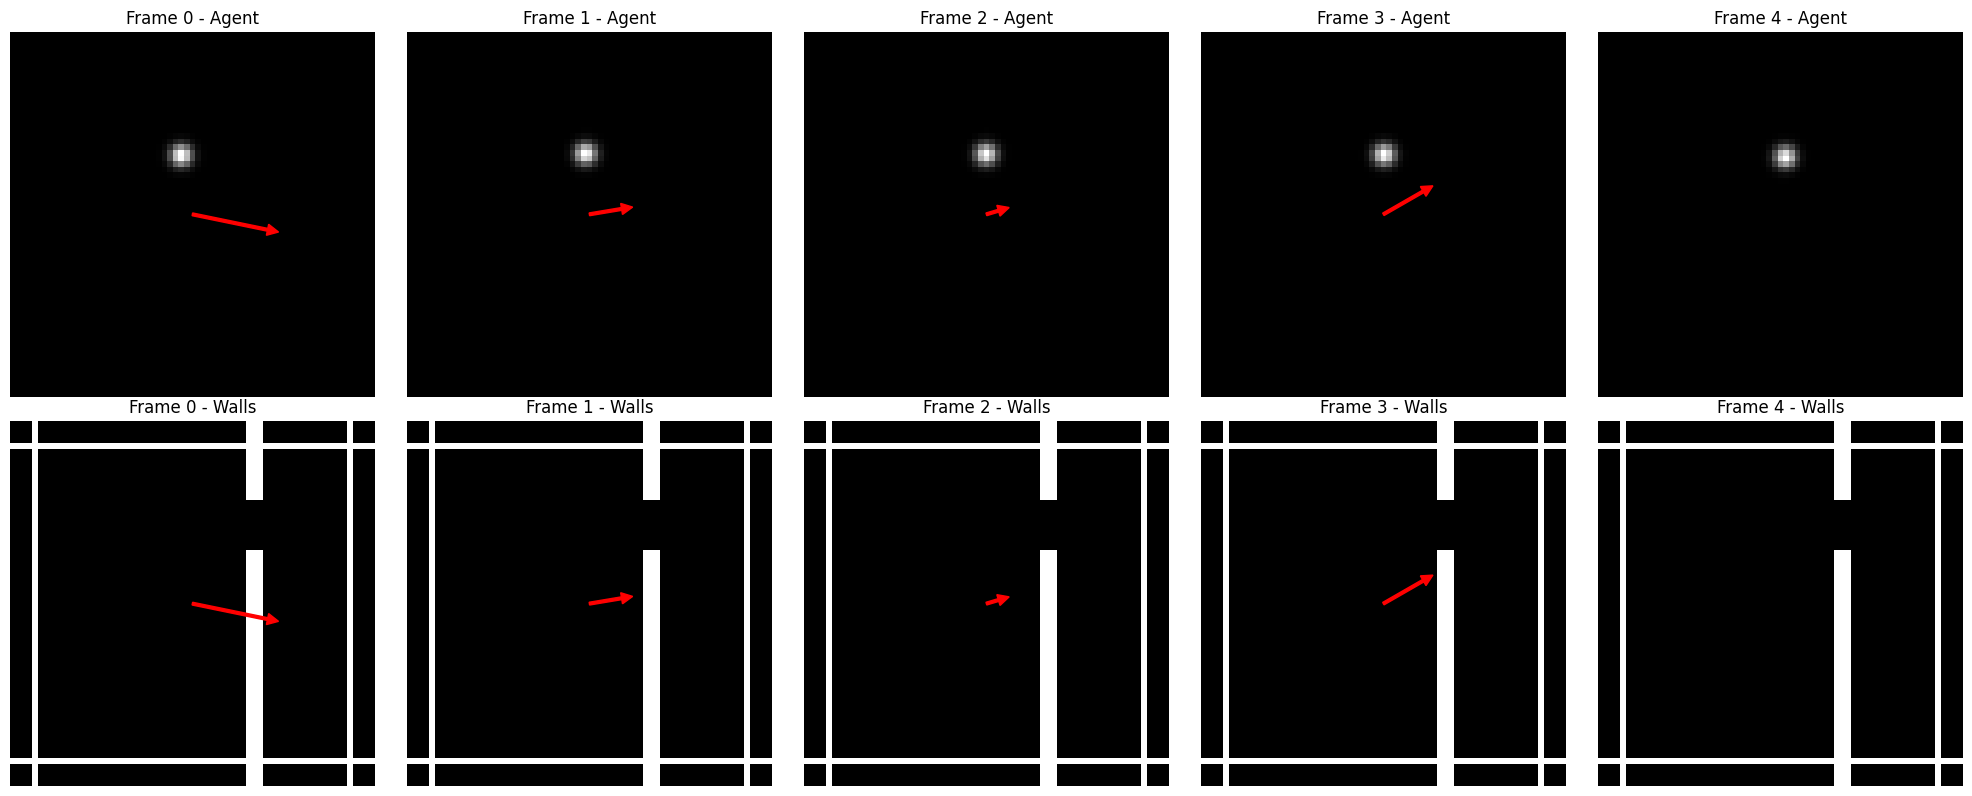

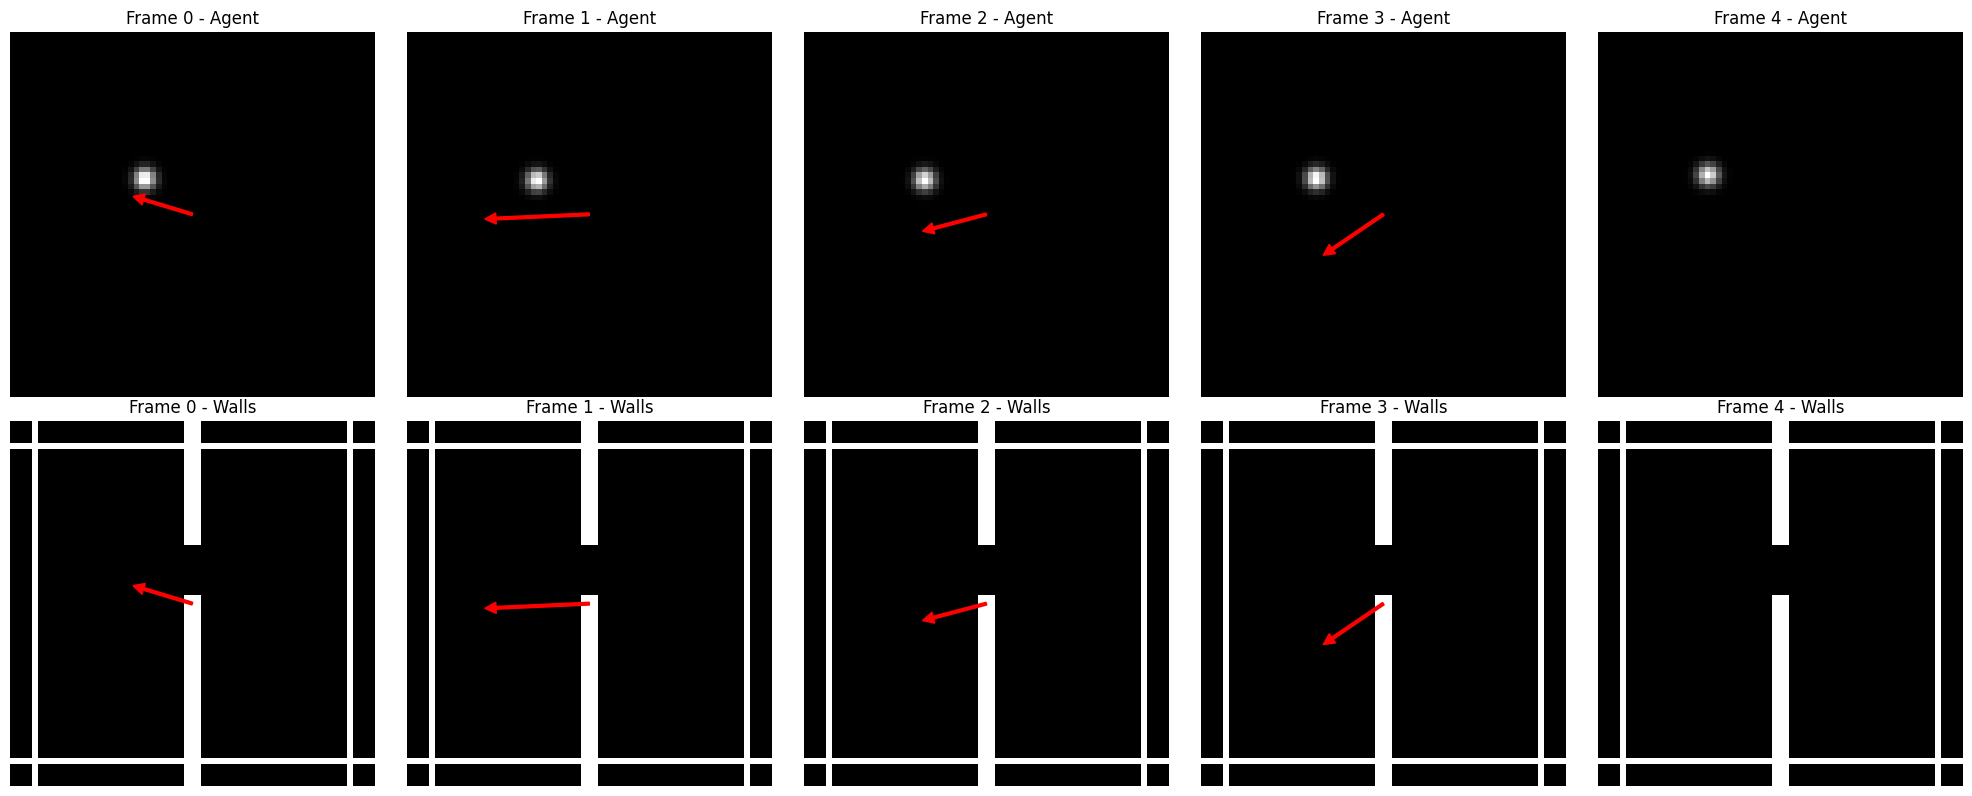

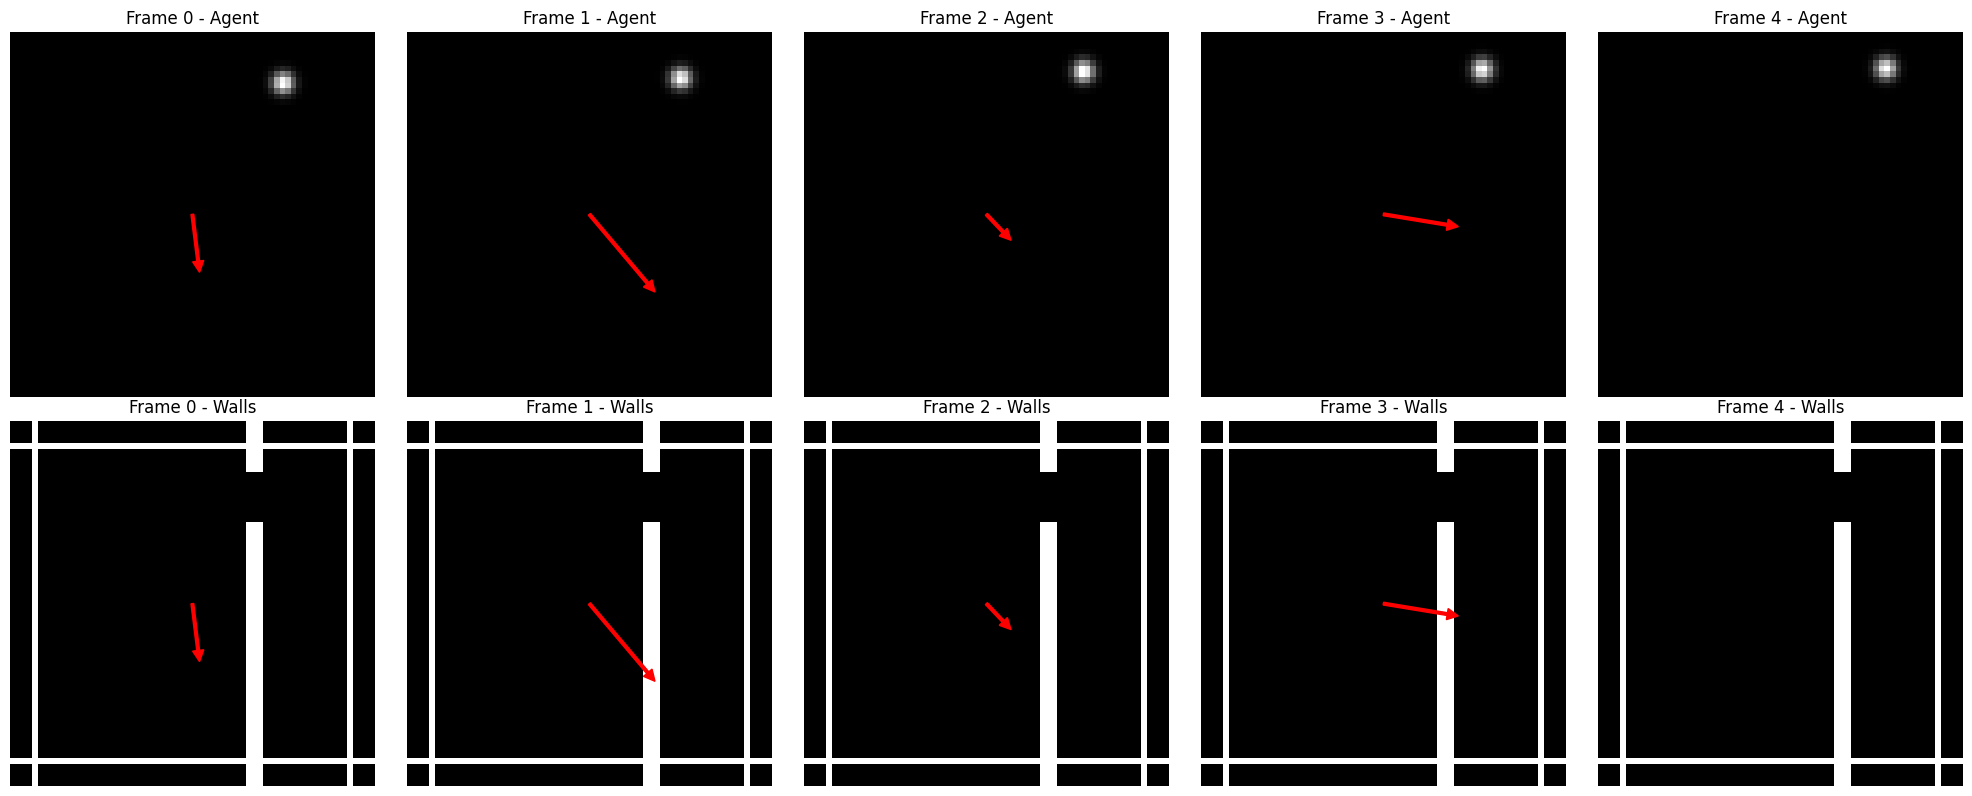

In [4]:
print("Visualizing training data samples:")
for i, sample in enumerate(train_dataloader):
    visualize_sample(sample)
    if i == 2:
        break

In [5]:
probe_normal_train = create_wall_dataloader("/scratch/DL24FA/probe_normal/train", probing=True, device="cpu", batch_size=1)
probe_normal_val = create_wall_dataloader("/scratch/DL24FA/probe_normal/val", probing=True, device="cpu", batch_size=1)
probe_wall_val = create_wall_dataloader("/scratch/DL24FA/probe_wall/val", probing=True, device="cpu", batch_size=1)

In [6]:
def visualize_probing_sample(sample, title):
    
    states = sample.states.cpu().numpy()
    actions = sample.actions.cpu().numpy()
    locations = sample.locations.cpu().numpy()
    
    print(f"States shape: {states.shape}")
    print(f"Actions shape: {actions.shape}")
    print(f"Locations shape: {locations.shape}")
    
    print(f"States data type: {states.dtype}")
    print(f"States min value: {np.min(states)}, max value: {np.max(states)}")
    frame = states[0, 0]
    
    
    combined_state = np.max(frame, axis=0)
    print(f"Combined state shape: {combined_state.shape}")
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(combined_state, cmap='gray')
    
    ax.plot(locations[0, :, 0], locations[0, :, 1], 'r-', linewidth=2)
    ax.set_title(title)
    ax.axis('off')
    plt.show()


Visualizing probing data samples:
States shape: (1, 17, 2, 65, 65)
Actions shape: (1, 16, 2)
Locations shape: (1, 17, 2)
States data type: float32
States min value: 0.0, max value: 0.09415438026189804
Combined state shape: (65, 65)


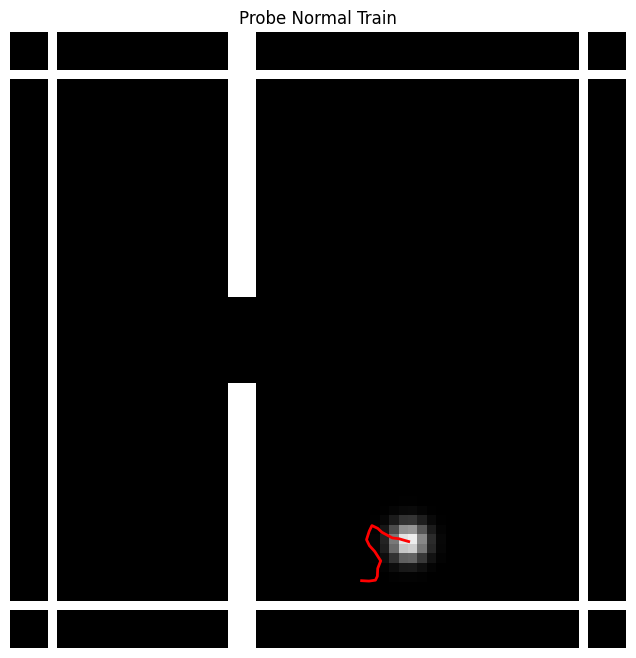

States shape: (1, 17, 2, 65, 65)
Actions shape: (1, 16, 2)
Locations shape: (1, 17, 2)
States data type: float32
States min value: 0.0, max value: 0.09415426105260849
Combined state shape: (65, 65)


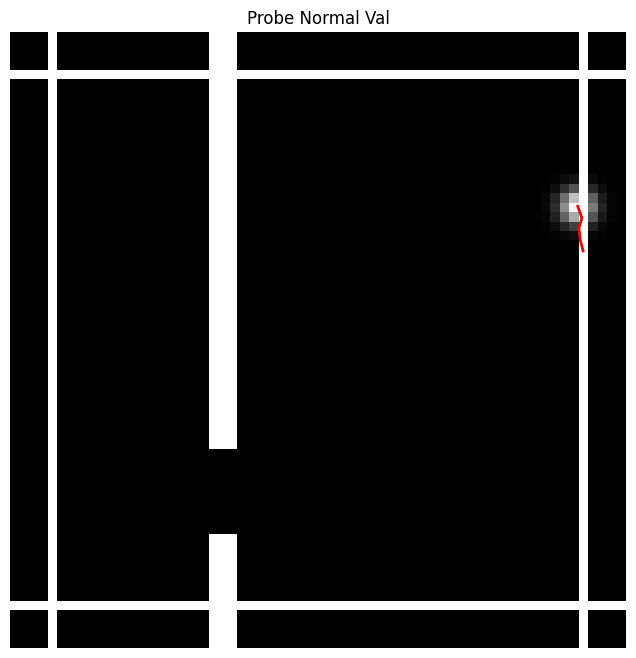

States shape: (1, 17, 2, 65, 65)
Actions shape: (1, 16, 2)
Locations shape: (1, 17, 2)
States data type: float32
States min value: 0.0, max value: 0.09407812356948853
Combined state shape: (65, 65)


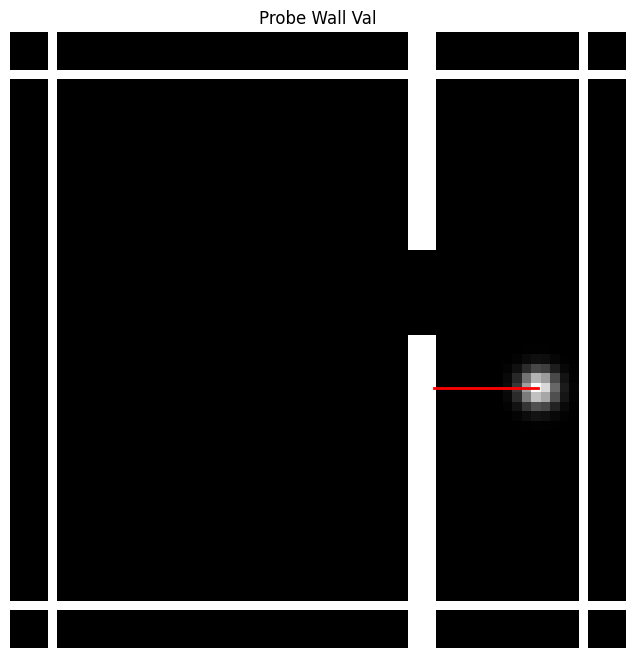

In [7]:
print("\nVisualizing probing data samples:")
for dataloader, title in [(probe_normal_train, "Probe Normal Train"),
                          (probe_normal_val, "Probe Normal Val"),
                          (probe_wall_val, "Probe Wall Val")]:
    sample = next(iter(dataloader))
    visualize_probing_sample(sample, title)

In [8]:
sample = next(iter(train_dataloader))

In [12]:
def visualize_sample_trajectory(sample):
    states = sample.states.cpu().numpy()[0]  # Assuming batch size 1
    actions = sample.actions.cpu().numpy()[0]
    
    num_frames = states.shape[0]
    fig, axes = plt.subplots(2, num_frames, figsize=(20, 8))
    
    for i in range(num_frames):
        # Agent channel
        axes[0, i].imshow(states[i, 0], cmap='gray')
        # axes[0, i].set_title(f"Frame {i} - Agent")
        axes[0, i].axis('off')
        
        # Wall channel
        axes[1, i].imshow(states[i, 1], cmap='gray')
        # axes[1, i].set_title(f"Frame {i} - Walls")
        axes[1, i].axis('off')
        
        if i < num_frames - 1:
            # Draw action arrow on both channels
            for ax in [axes[0, i], axes[1, i]]:
                ax.arrow(32, 32, actions[i, 0] * 10, -actions[i, 1] * 10, 
                         color='red', width=0.5, head_width=2, head_length=2)
    
    plt.tight_layout()
    plt.show()

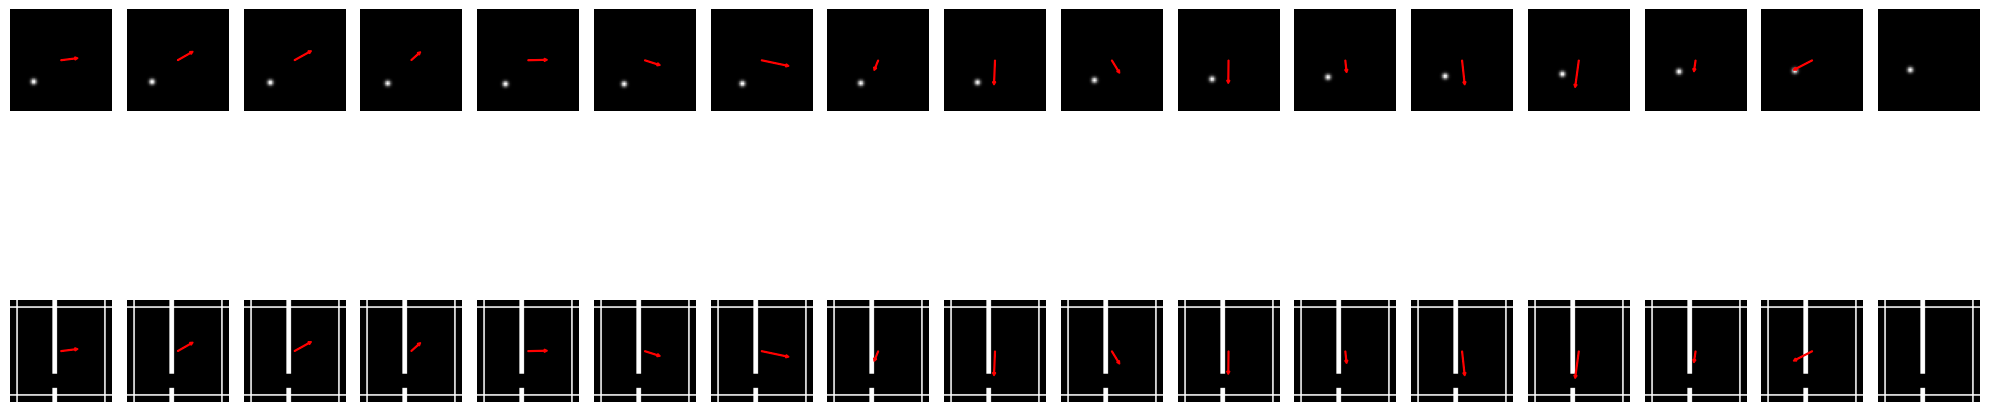

In [13]:
visualize_sample_trajectory(sample)

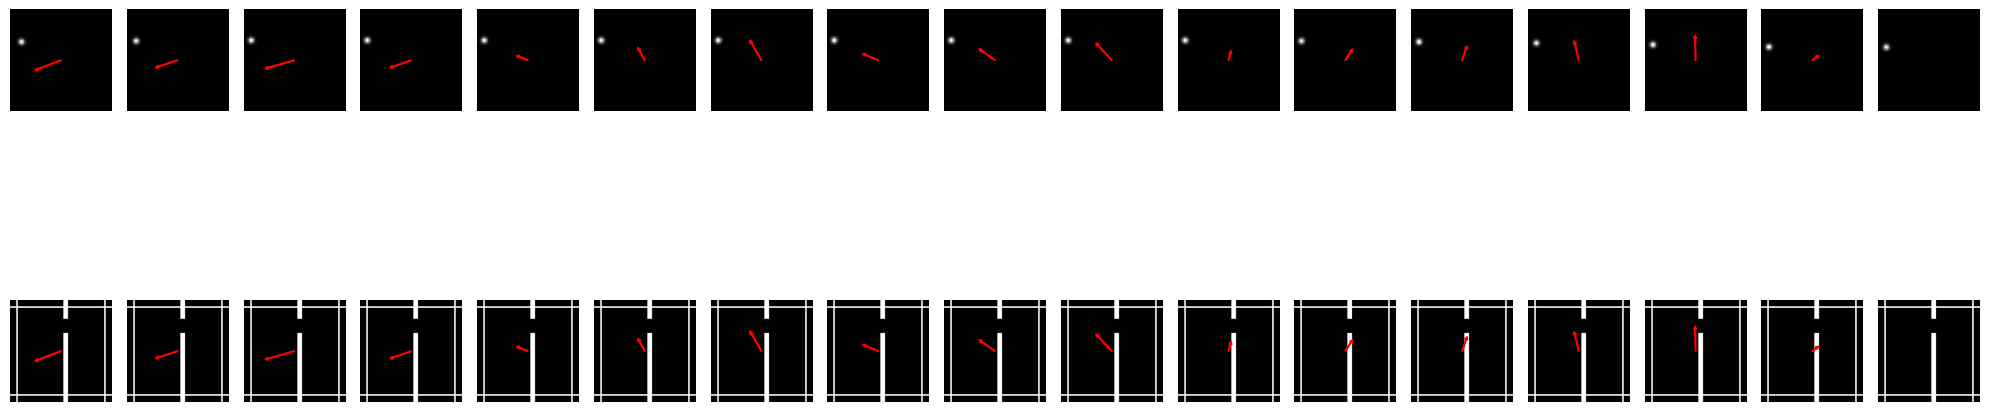

In [14]:
sample = next(iter(train_dataloader))
visualize_sample_trajectory(sample)

In [15]:
def visualize_combined(sample):
    states = sample.states.cpu().numpy()[0]  # Assuming batch size 1
    actions = sample.actions.cpu().numpy()[0]
    num_frames = states.shape[0]

    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Create a combined image for all frames
    combined_image = np.maximum(states[:, 0], states[:, 1])  # Combine agent and wall channels
    ax.imshow(combined_image.max(axis=0), cmap='gray')

    # Plot the agent's trajectory
    for i in range(num_frames - 1):
        start_x, start_y = np.where(states[i, 0] > 0)
        end_x, end_y = np.where(states[i+1, 0] > 0)
        if len(start_x) > 0 and len(end_x) > 0:
            ax.arrow(start_y[0], start_x[0], end_y[0] - start_y[0], end_x[0] - start_x[0],
                     color='red', width=0.5, head_width=2, head_length=2)

    ax.set_title("Combined View - Full Trajectory")
    ax.axis('off')
    plt.show()

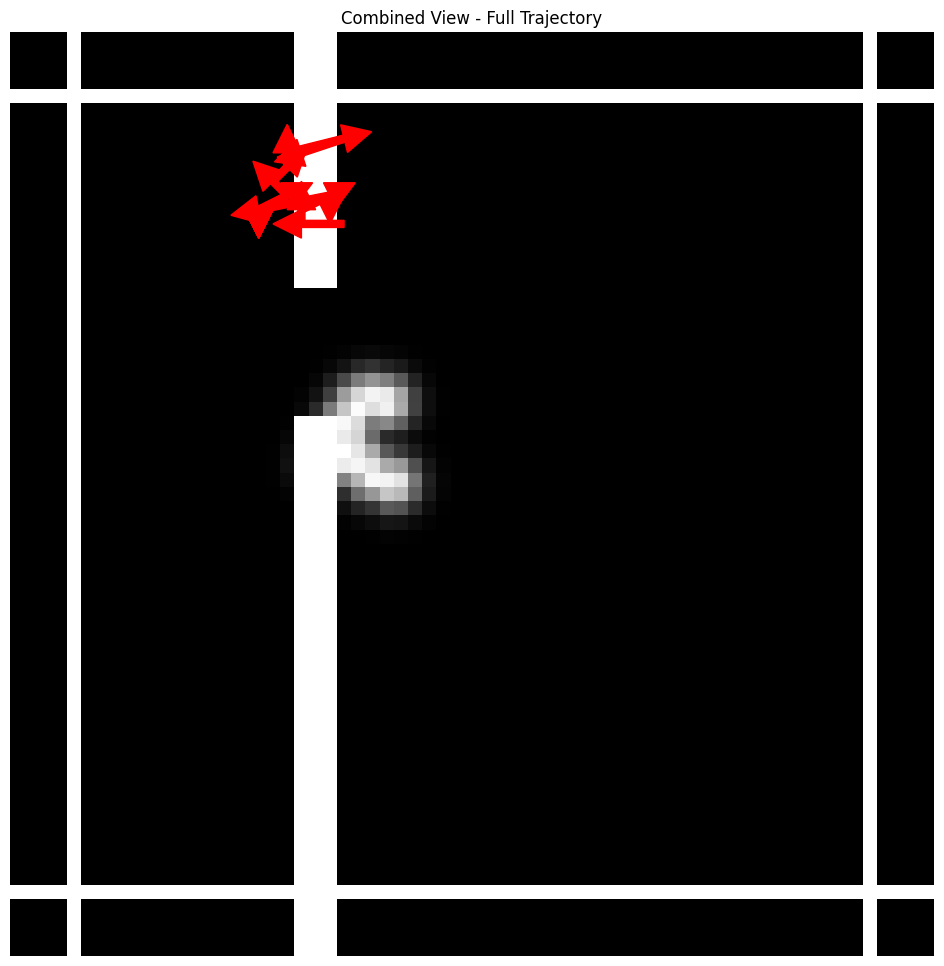

In [24]:
sample = next(iter(train_dataloader))
visualize_combined(sample)

Analyzing Training Dataset...


/scratch/hs5580/dl_proj/dataset.py:32: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  states = torch.from_numpy(self.states[i]).float().to(self.device)



## Dataset Statistics ##
States shape: torch.Size([1, 17, 2, 65, 65])
Actions shape: torch.Size([1, 16, 2])


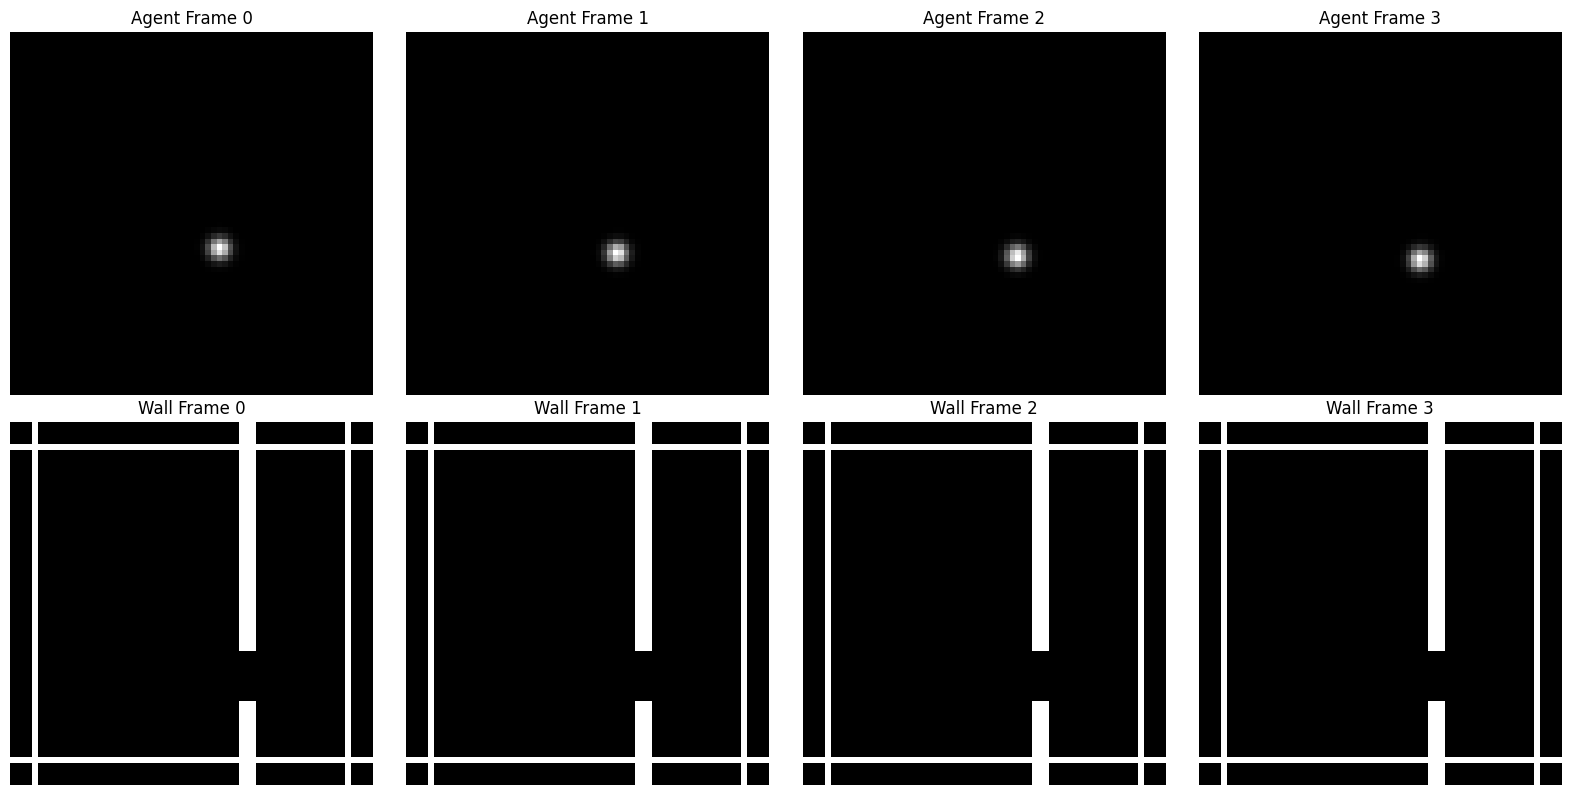


## Action Statistics ##
Action range: [-0.102, 1.318]
Mean action: [0.580]
Action std: [0.417]


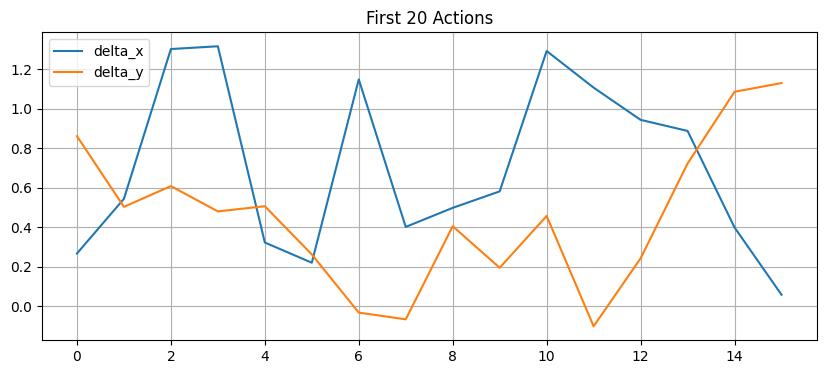


Analyzing Probing Dataset...

## Dataset Statistics ##
States shape: torch.Size([1, 17, 2, 65, 65])
Actions shape: torch.Size([1, 16, 2])
Locations shape: torch.Size([1, 17, 2])


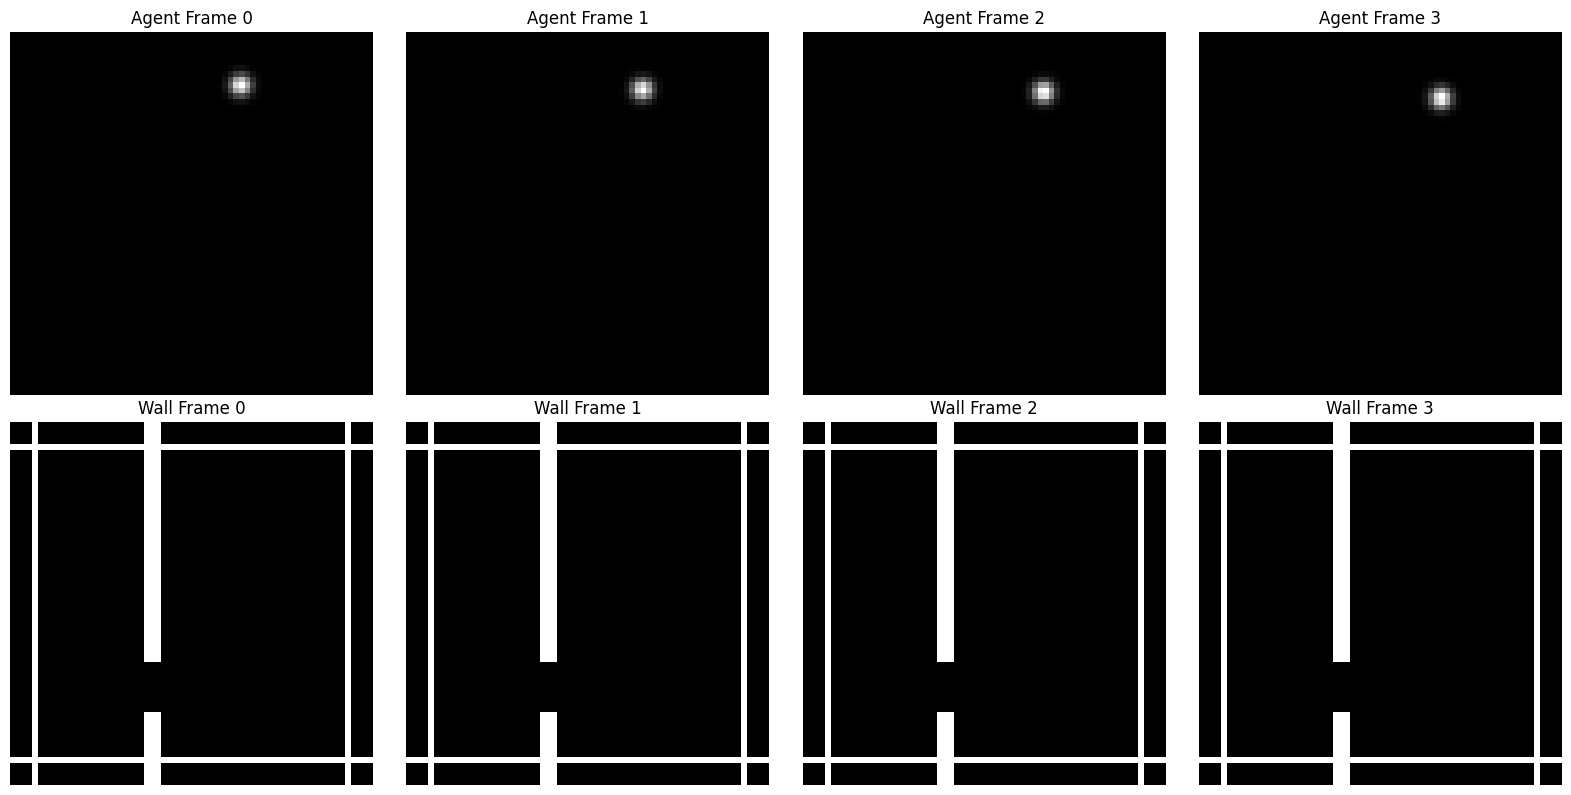


## Action Statistics ##
Action range: [-1.305, 1.738]
Mean action: [0.261]
Action std: [0.728]


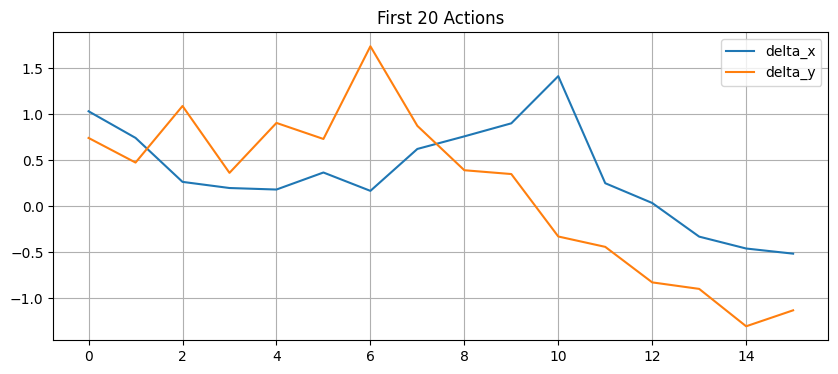

In [2]:
def analyze_dataset(data_path, is_probing=False):
    # Create dataloader
    loader = create_wall_dataloader(
        data_path=data_path,
        probing=is_probing,
        device="cpu",  # Using CPU for visualization
        batch_size=1
    )
    
    # Get first sample
    sample = next(iter(loader))
    
    print("\n## Dataset Statistics ##")
    print(f"States shape: {sample.states.shape}")
    print(f"Actions shape: {sample.actions.shape}")
    if is_probing:
        print(f"Locations shape: {sample.locations.shape}")
    
    # Visualize first trajectory
    states = sample.states[0]  # [T, 2, 64, 64]
    actions = sample.actions[0]  # [T-1, 2]
    
    # Plot first few frames
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    for i in range(4):
        # Plot agent channel
        axes[0, i].imshow(states[i, 0], cmap='gray')
        axes[0, i].set_title(f'Agent Frame {i}')
        axes[0, i].axis('off')
        
        # Plot wall channel
        axes[1, i].imshow(states[i, 1], cmap='gray')
        axes[1, i].set_title(f'Wall Frame {i}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze actions
    print("\n## Action Statistics ##")
    print(f"Action range: [{actions.min().item():.3f}, {actions.max().item():.3f}]")
    print(f"Mean action: [{actions.mean().item():.3f}]")
    print(f"Action std: [{actions.std().item():.3f}]")
    
    # Plot first few actions
    plt.figure(figsize=(10, 4))
    plt.plot(actions[:20, 0].numpy(), label='delta_x')
    plt.plot(actions[:20, 1].numpy(), label='delta_y')
    plt.title('First 20 Actions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Analyze training dataset
print("Analyzing Training Dataset...")
analyze_dataset("/scratch/DL24FA/train", is_probing=False)

# Analyze probing dataset
print("\nAnalyzing Probing Dataset...")
analyze_dataset("/scratch/DL24FA/probe_normal/train", is_probing=True)